In [64]:
import pandas as pd
from sklearn.preprocessing import normalize,StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.decomposition import PCA

## 1.Data Loading

In [2]:
data = pd.read_csv('Datasets/crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## 2.Data Analysis

In [3]:
data.shape

(50, 5)

In [4]:
data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [5]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

## 3.Data Preprocessing

In [7]:
print(len(data['Unnamed: 0']))
data['Unnamed: 0'].unique()

50


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

## 4.Hierarichal Clustering
### 4.1. Dendogram

In [10]:
hie_clus_data = data.iloc[:,1:]
col = hie_clus_data.columns
hie_clus_data = pd.DataFrame(normalize(hie_clus_data),columns=col)

hie_clus_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


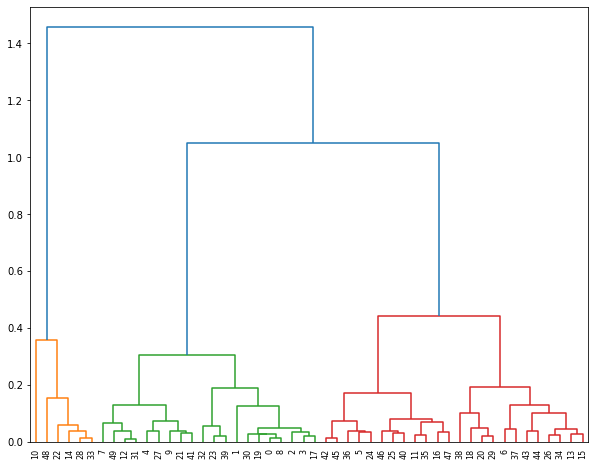

In [13]:
plt.figure(figsize=(10,8))

linkage = sch.linkage(hie_clus_data, method='ward', metric='euclidean')
dendo = sch.dendrogram(linkage,orientation='top',distance_sort='decending',show_leaf_counts=True)
plt.show()

In [15]:
hie_clus_model = AgglomerativeClustering()
hie_clus = hie_clus_model.fit_predict(hie_clus_data)
hie_clus

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [16]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
data['hie_clus'] = hie_clus
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie_clus
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [18]:
data.groupby('hie_clus')[['Murder','Assault','UrbanPop','Rape']].mean()

,Murder,Assault,UrbanPop,Rape
hie_clus,,,,
0,8.493182,186.568182,66.022727,22.445455
1,2.616667,54.833333,62.000000,12.333333


## let us asume three clusters

In [19]:
hie_clus_model2 = AgglomerativeClustering(n_clusters=3)
hie_clus2 = hie_clus_model2.fit_predict(hie_clus_data)
hie_clus2

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

In [20]:
data['hie_clus3'] = hie_clus2
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie_clus,hie_clus3
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,2


In [21]:
data.groupby('hie_clus3')[['Murder','Assault','UrbanPop','Rape']].mean()

,Murder,Assault,UrbanPop,Rape
hie_clus3,,,,
0,5.770833,129.083333,65.958333,18.575000
1,2.616667,54.833333,62.000000,12.333333
2,11.760000,255.550000,66.100000,27.090000


<AxesSubplot:ylabel='hie_clus3'>

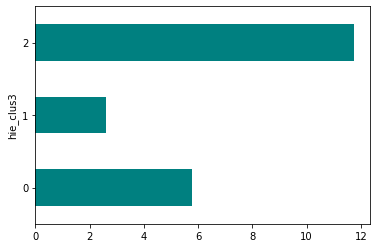

In [24]:
data.groupby('hie_clus3')['Murder'].mean().plot(kind = 'barh',color='teal')

## K_means Clustering
### finding the optilmal value of k(no of clusters)

In [25]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie_clus,hie_clus3
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,2


In [26]:
k_means_data = data.iloc[:,1:]
col = k_means_data.columns
k_means_data = pd.DataFrame(normalize(k_means_data),columns=col)

k_means_data.head()

,Murder,Assault,UrbanPop,Rape,hie_clus,hie_clus3
0,0.054030,0.965983,0.237403,0.086775,0.0,0.008186
1,0.036871,0.969713,0.176982,0.164077,0.0,0.007374
2,0.026438,0.959603,0.261117,0.101183,0.0,0.006528
3,0.044525,0.961342,0.252985,0.098664,0.0,0.010119
4,0.030656,0.940112,0.309965,0.138292,0.0,0.006812


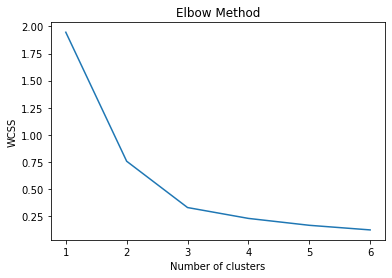

In [29]:
## Elbow Curve
wcss = []
for i in range(1, 7):
    k_means = KMeans(n_clusters=i,random_state=12)
    k_means.fit(k_means_data)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**Optimal values seems to be 3**

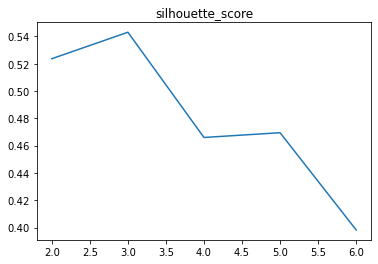

In [31]:
#using silhouette coeff
range_n_clusters = [2,3,4,5,6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    k_means = KMeans(n_clusters=num_clusters)
    k_means.fit(k_means_data)
    cluster_labels = k_means.labels_
    silhouette_avg.append(silhouette_score(k_means_data, cluster_labels))
    
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg) 
plt.title('silhouette_score')
plt.show()

**Optimal value seems to be 1**

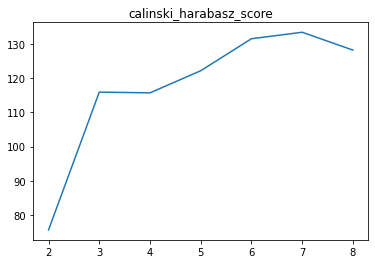

In [35]:
# using calinski_harabasz coeff

cal_score = []
range_n_clusters = [2,3,4,5,6,7,8]
for i in range_n_clusters:
    k_means = KMeans(n_clusters=i, random_state=1).fit(k_means_data)
    labels = k_means.labels_
    cal_score.append(calinski_harabasz_score(k_means_data, labels))
    
plt.plot(range_n_clusters,cal_score)
plt.title('calinski_harabasz_score')
plt.show()

**Optimal value is 7**

## mojaority says 3 so lets say Kmean model can have best clusters of 3

## building Kmeans model

In [39]:
k_means = KMeans(n_clusters=3)
k_means_data['Kmeans_clus'] = k_means.fit_predict(k_means_data)

In [40]:
k_means_data.head()

,Murder,Assault,UrbanPop,Rape,hie_clus,hie_clus3,Kmeans_clus
0,0.054030,0.965983,0.237403,0.086775,0.0,0.008186,0
1,0.036871,0.969713,0.176982,0.164077,0.0,0.007374,0
2,0.026438,0.959603,0.261117,0.101183,0.0,0.006528,0
3,0.044525,0.961342,0.252985,0.098664,0.0,0.010119,0
4,0.030656,0.940112,0.309965,0.138292,0.0,0.006812,0


In [43]:
data['Kmeans_clus'] = k_means_data['Kmeans_clus']
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie_clus,hie_clus3,Kmeans_clus
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,2,0
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,0,2,0
5,Colorado,7.9,204,78,38.7,0,0,0
6,Connecticut,3.3,110,77,11.1,0,0,2
7,Delaware,5.9,238,72,15.8,0,2,0
8,Florida,15.4,335,80,31.9,0,2,0
9,Georgia,17.4,211,60,25.8,0,2,0


In [50]:

data.groupby('Kmeans_clus')[['Murder','Assault',
                             'UrbanPop','Rape']].agg('mean').sort_values("Murder", ascending=True)



,Murder,Assault,UrbanPop,Rape
Kmeans_clus,,,,
1,2.616667,54.833333,62.000000,12.333333
2,5.020000,117.950000,64.600000,16.635000
0,11.387500,243.750000,67.208333,27.287500


<AxesSubplot:ylabel='Kmeans_clus'>

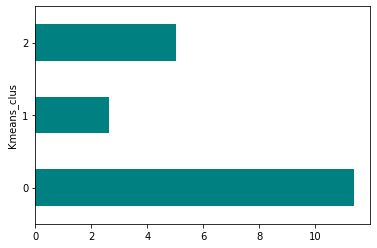

In [51]:
data.groupby('Kmeans_clus')['Murder'].mean().plot(kind = 'barh',color='teal')

## DBSCAN clustering

In [56]:
dbs_data = data.iloc[:,1:-3]
dbs_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [57]:
##Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dbs_data)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

## Reducing the dimensionality of the data to make it visualizable

In [60]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,0.772380,0.692741
1,0.736314,0.307604
2,0.882095,-0.424357
3,0.053057,1.008616
4,0.844660,-0.561549


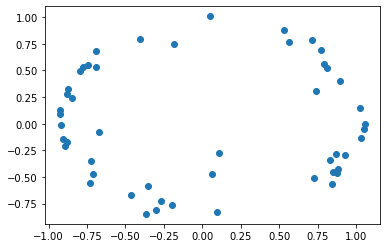

In [62]:
plt.scatter(X_principal['P1'],X_principal['P2'])
plt.show()

## Building the clustering model

In [65]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.05, min_samples =3).fit(X_principal)
labels = db_default.labels_
labels

array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  2, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1, -1,  1, -1])

In [66]:
pd.Series(labels).unique()

array([-1,  0,  1,  2])

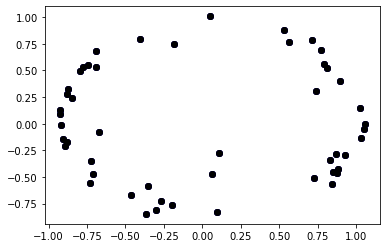

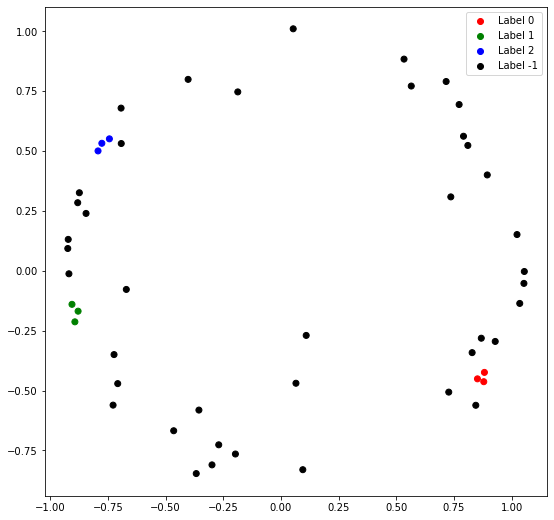

In [68]:

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()